<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 157.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 154.4 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [50]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv")
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

df['Age_num'] = df['Age'].map(age_mapping)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_num
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65452,35588,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time;Employed, part-time",In-person,Apples,Hobby;Contribute to open-source projects;Schoo...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",NaN,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN,21.0
65453,50580,I am a developer by profession,18-24 years old,"Employed, full-time;Employed, part-time",Remote,Apples,Hobby;Freelance/contract work,Some college/university study without earning ...,"Colleague;Other online resources (e.g., videos...",Technical documentation;Blogs;Written Tutorial...,...,50.0,90.0,0.0,0.0,0.0,Too long,Easy,NaN,9.0,21.0
65454,9938,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Apples,Bootstrapping a business;School or academic wo...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,...,60.0,60.0,50.0,0.0,50.0,Appropriate in length,Easy,997.0,4.0,39.5
65455,40874,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Stack Over...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,NaN,6.0,29.5


**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [51]:
## Write your code here
remove_id_rows = []
for i in df.ResponseId.unique():
    filt_df = df[df.ResponseId==i]

    if len(filt_df.index.tolist()) > 1:
        remove_id_rows.append(filt_df.index.tolist()[1])

print('repeating Response IDs',len(remove_id_rows))

repeating Response IDs 20


In [52]:
len(df) - df.ResponseId.nunique()

20

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [53]:
## Write your code here
print('starting number of rows', len(df))
df.drop(remove_id_rows, inplace=True) 
print('final number of rows', len(df))

starting number of rows 65457
final number of rows 65437


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [54]:
## Write your code here
col_name = []
nan_per = []
nan_per_df = pd.DataFrame() 
for c in list(df.columns):
    col_name.append(c) 
    nan_per.append(round((df[c].isnull().mean() * 100),2)) 

nan_per_df['Column_name'] = col_name
nan_per_df['Nan_Percent'] = nan_per 

nan_per_df 

,Column_name,Nan_Percent
0,ResponseId,0.00
1,MainBranch,0.00
2,Age,0.00
3,Employment,0.00
4,RemoteWork,16.25
...,...,...
110,SurveyLength,14.14
111,SurveyEase,14.06
112,ConvertedCompYearly,64.19
113,JobSat,55.49


In [57]:
most_nan_df = nan_per_df[nan_per_df.Nan_Percent != 0.0].sort_values(by='Nan_Percent', ascending=False).reset_index(drop=True)
most_nan_df.head(25)

,Column_name,Nan_Percent
0,AINextMuch less integrated,98.25
1,AINextLess integrated,96.40
2,AINextNo change,80.90
3,AINextMuch more integrated,79.46
4,EmbeddedAdmired,74.43
5,EmbeddedWantToWorkWith,73.10
6,EmbeddedHaveWorkedWith,66.05
7,ConvertedCompYearly,64.19
8,AIToolNot interested in Using,62.69
9,AINextMore integrated,62.67


In [64]:
most_nan_df = most_nan_df[most_nan_df.Column_name!='ConvertedCompYearly'].reset_index(drop=True)
most_nan_df.head(10)

,Column_name,Nan_Percent
0,AINextMuch less integrated,98.25
1,AINextLess integrated,96.40
2,AINextNo change,80.90
3,AINextMuch more integrated,79.46
4,EmbeddedAdmired,74.43
5,EmbeddedWantToWorkWith,73.10
6,EmbeddedHaveWorkedWith,66.05
7,AIToolNot interested in Using,62.69
8,AINextMore integrated,62.67
9,Knowledge_9,57.77


In [65]:
# Drop columns with > 60% NaNs 
drop_cols = most_nan_df.Column_name[most_nan_df.Nan_Percent >= 60.00].tolist()
drop_cols 

['AINextMuch less integrated',
 'AINextLess integrated',
 'AINextNo change',
 'AINextMuch more integrated',
 'EmbeddedAdmired',
 'EmbeddedWantToWorkWith',
 'EmbeddedHaveWorkedWith',
 'AIToolNot interested in Using',
 'AINextMore integrated']

In [66]:
df.drop(columns=drop_cols, inplace=True)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_num
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,21.0


In [67]:
# Check columns between 20%-60%
con_col_list = most_nan_df.Column_name[(most_nan_df.Nan_Percent >= 20.00) & (most_nan_df.Nan_Percent <= 60.00)].tolist()
con_col_list

['Knowledge_9',
 'Frequency_3',
 'Knowledge_8',
 'ProfessionalTech',
 'Knowledge_7',
 'Knowledge_6',
 'Knowledge_5',
 'Knowledge_2',
 'Knowledge_4',
 'Knowledge_3',
 'Frustration',
 'Frequency_1',
 'Frequency_2',
 'ProfessionalCloud',
 'Knowledge_1',
 'ProfessionalQuestion',
 'TimeAnswering',
 'Industry',
 'TimeSearching',
 'JobSat',
 'JobSatPoints_1',
 'JobSatPoints_4',
 'JobSatPoints_5',
 'JobSatPoints_7',
 'JobSatPoints_11',
 'JobSatPoints_8',
 'JobSatPoints_6',
 'JobSatPoints_10',
 'JobSatPoints_9',
 'MiscTechAdmired',
 'WorkExp',
 'ICorPM',
 'AIToolInterested in Using',
 'PlatformAdmired',
 'MiscTechWantToWorkWith',
 'CompTotal',
 'PlatformWantToWorkWith',
 'WebframeAdmired',
 'AIToolCurrently Using',
 'AISearchDevAdmired',
 'AISearchDevWantToWorkWith',
 'AIBen',
 'AIComplex',
 'OfficeStackAsyncAdmired',
 'AIAcc',
 'AIChallenges',
 'WebframeWantToWorkWith',
 'DatabaseAdmired',
 'OfficeStackAsyncWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'TechDoc',
 'AIEthics',
 'PlatformHaveWork

In [47]:
keep_cols = ['LanguageAdmired',
'YearsCodePro',
'LearnCodeOnline',
'AIEthics',
'AIThreat',
'AIChallenges',
'WorkExp',
'AIBen',
'AISent',
'AIAcc',
'AISearchDevHaveWorkedWith',
'AIToolInterested in Using',
'AIToolCurrently Using',
'DatabaseHaveWorkedWith',
'NEWCollabToolsAdmired',
'OfficeStackAsyncHaveWorkedWith',
'OfficeStackSyncWantToWorkWith',
'OfficeStackSyncAdmired',
'WebframeHaveWorkedWith',
'ToolsTechWantToWorkWith',
'SOPartFreq',
'Industry',
'MiscTechAdmired',
'MiscTechWantToWorkWith',
'PlatformAdmired',
'PlatformWantToWorkWith',
'WebframeAdmired',
 'AISearchDevAdmired',
 'AISearchDevWantToWorkWith',
 'AIComplex',
 'OfficeStackAsyncAdmired',
 'WebframeWantToWorkWith',
 'DatabaseAdmired',
 'OfficeStackAsyncWantToWorkWith',
 'MiscTechHaveWorkedWith',
'PlatformHaveWorkedWith',
 'DatabaseWantToWorkWith',
'ToolsTechAdmired',
'OrgSize',
 'NEWCollabToolsWantToWorkWith'] 

result_list = [item for item in con_col_list if item not in keep_cols]
result_list






df.drop(columns=result_list, inplace=True)
df


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,AIToolCurrently Using,AIToolInterested in Using,AIThreat,AIEthics,AIChallenges,WorkExp,Industry,SurveyLength,SurveyEase,Age_num
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,Learning about a codebase;Project planning;Wri...,Testing code;Committing and reviewing code;Pre...,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers,NaN,NaN,Too long,Easy,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,Learning about a codebase;Project planning;Wri...,Debugging and getting help;Testing code;Deploy...,No,Circulating misinformation or disinformation,"AI tools lack context of codebase, internal a...",NaN,NaN,NaN,NaN,21.0
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,21.0


In [71]:
# NaNs between 5-10% use most common value 
# Except EdLevel and Country
replace_value_cols = most_nan_df.Column_name[(most_nan_df.Nan_Percent >= 5.00) & (most_nan_df.Nan_Percent <= 10.00)].tolist()

for c in replace_value_cols:
    if (c=='Country') or (c=='EdLevel'): 
        continue 
    else: 
        mode_col = df[c].mode()[0]
        print(c, mode_col) 
        df[c].fillna(mode_col, inplace=True)

SOHow Quickly finding code solutions;Finding reliable guidance from community-vetted answers
SOComm No, not really
DevType Developer, full-stack
SOVisitFreq A few times per week
SOAccount Yes
LanguageHaveWorkedWith HTML/CSS;JavaScript;TypeScript
YearsCode 10
NEWSOSites Stack Overflow;Stack Exchange
LearnCode Other online resources (e.g., videos, blogs, forum, online community)
AISelect Yes


/tmp/ipykernel_299/1037010073.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(mode_col, inplace=True)


In [74]:
df['SOHow'].isna().sum()

np.int64(0)

### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [76]:
## Write your code here
list(df.columns)

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackAsyncAdmire

### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


In [102]:
## Write your code here
!pip install matplotlib
import matplotlib.pyplot as plt

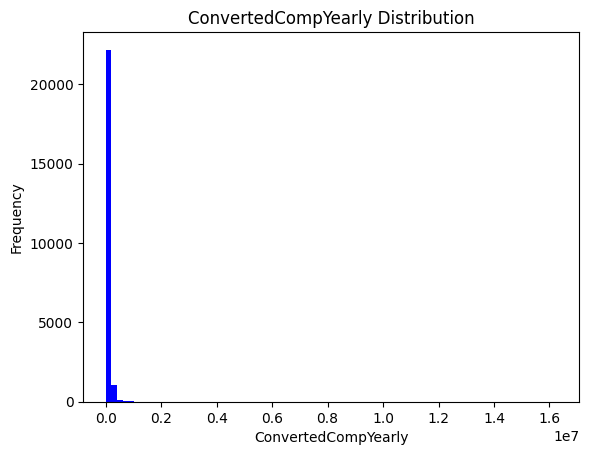

In [110]:
# Create a box plot of the 'Value' column
checkdf = df.dropna(subset=['ConvertedCompYearly'])
plt.hist(checkdf['ConvertedCompYearly'], bins=80, color='blue')
plt.title('ConvertedCompYearly Distribution')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.show()

In [114]:
df['ConvertedCompYearly'].describe()
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)

/tmp/ipykernel_299/1157887439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)


In [115]:
# Find the minimum and maximum values in 'ConvertedCompYearly'
min_value = float(df['ConvertedCompYearly'].min())
max_value = float(df['ConvertedCompYearly'].max())

# Apply Min-Max normalization to 'ConvertedCompYearly'
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'].astype(float) - min_value) / (max_value - min_value)

In [117]:
# Calculate the mean and standard deviation of 'ConvertedCompYearly'
mean_value = df['ConvertedCompYearly'].mean()
std_dev = df['ConvertedCompYearly'].std()

# Apply the Z-score formula
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_value) / std_dev

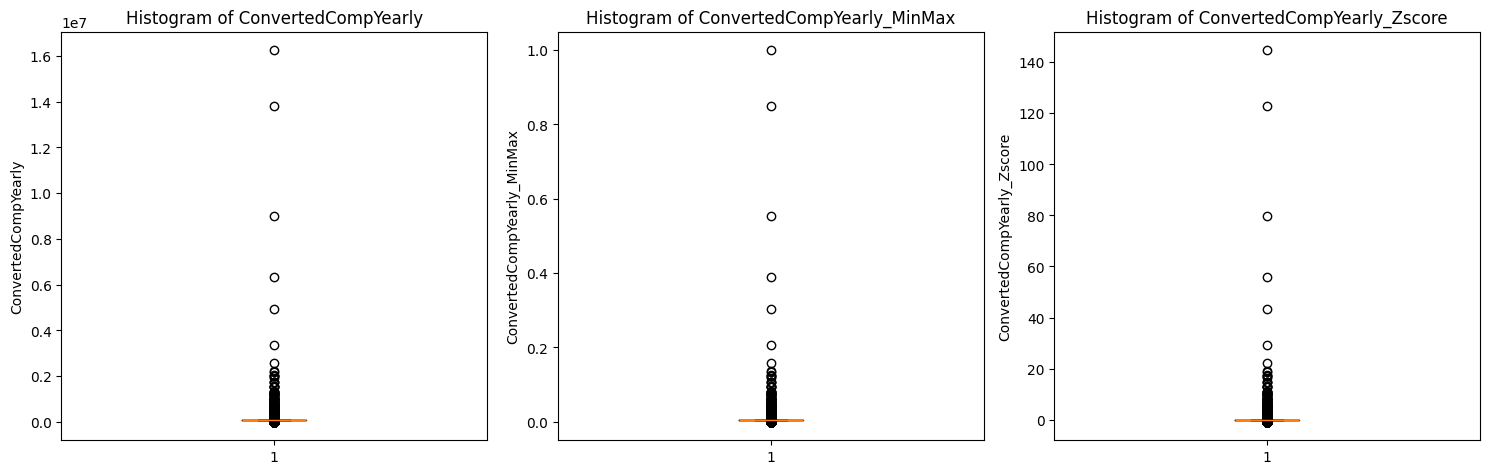

In [118]:
## Write your code here

# Create a figure for the histograms
plt.figure(figsize=(15, 5))

# Plot histogram for the original 'ConvertedCompYearly'
plt.subplot(1, 3, 1)
plt.boxplot(df['ConvertedCompYearly'])
plt.title('Histogram of ConvertedCompYearly')
plt.ylabel('ConvertedCompYearly')

# Plot histogram for 'ConvertedCompYearly_MinMax'
plt.subplot(1, 3, 2)
plt.boxplot(df['ConvertedCompYearly_MinMax'])
plt.title('Histogram of ConvertedCompYearly_MinMax')
plt.ylabel('ConvertedCompYearly_MinMax')

# Plot histogram for 'ConvertedCompYearly_Zscore'
plt.subplot(1, 3, 3)
plt.boxplot(df['ConvertedCompYearly_Zscore'])
plt.title('Histogram of ConvertedCompYearly_Zscore')
plt.ylabel('ConvertedCompYearly_Zscore')

# Display the histograms
plt.tight_layout()
plt.show()

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
